In [ ]:
age카테고리
fare카테고리
family(parch,sibsp)

In [1]:
%pwd

'C:\\ca_ba\\caba_dataprocessing'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize = (6,5))
import seaborn as sns

In [2]:
titanic = pd.read_csv('dataset/titanic3.csv')
titanic.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [3]:
titanic


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [4]:
# 누락값이 많고, 유용한 정보가 없어보이는 칼럼 제거  
titanic.drop(['boat','body','home.dest'],axis = 1,inplace = True)

Q. 타이타닉 생존자 예측모델 개발을 위한 Titanic 분석용 데이터셋
Titanic data 전처리
분석 데이터 : titanic3.csv
재사용 가능한 전처리 사용자 함수 작성 하여 일괄 전처리 Null 값 처리 : Age는 평균나이, 나머지 칼럼은 'N'값으로 변경 Cabin 칼럼은 선실 번호 중 선실 등급을 나타내는 첫 번째 알파벳이 중요하며 앞문자만 추출 문자열 칼럼 레이블 인코딩 불필요한 속성 칼럼 삭제
탐색적 분석 필수 항목 : groupby() 또는 sns.barplot() 사용하여 성별 생존자, 객실 등급별 성별 생존자, 연령별(카테고리 분류) 생존자
통계적, 시각적 탐색을 통한 다양한 인사이트 도출
파생변수 : 분석에 필요한 파생변수 2개 이상 생성
탐색 결과에 대한 종합 의견
컬럼 정보
survived : 생존여부(1: 생존, 0 : 사망)
pclass : 승선권 클래스(1 : 1st, 2 : 2nd ,3 : 3rd)
name : 승객 이름
sex : 승객 성별
age : 승객 나이
sibsp : 동반한 형제자매, 배우자 수
parch : 동반한 부모, 자식 수
ticket : 티켓의 고유 넘버
fare 티켓의 요금
cabin : 객실 번호
embarked : 승선한 항구명(C : Cherbourg, Q : Queenstown, S : Southampton)
boat
body
home.dest

In [5]:
# 전처리용 데이터
df = titanic.copy()

In [6]:
# 유의하지않아 보이는 데이터 일단제거
df.drop(['name','ticket'], axis =1, inplace =True)

#### 남은 칼럼의 nan값 제거

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   fare      1308 non-null   float64
 7   cabin     295 non-null    object 
 8   embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 92.2+ KB


#### nan값이 가장 많은 'age'칼럼 nan제거 or 평균값으로 처리

In [8]:
df.info()
# df1.drop('sex',axis=1,inplace =True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   fare      1308 non-null   float64
 7   cabin     295 non-null    object 
 8   embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 92.2+ KB


In [9]:
# age의 값이 nan일 경우 age의 평균값인 29.8을 대입
# a = (df['age'] != df.age)
# df.age[a] = 29.8
# df

In [10]:
# 다른방법?  nan값을 제외한 승객중 나이대별로 카테고리를 분리 
# -> 나이대별 비율을 구함 -> 비율에 맞게 nan에 채움 

#### cabin의 nan값을 N으로변환 

In [11]:
b = (df['cabin'] != df.cabin)
df.cabin[b] = "N"

<ipython-input-11-f63b6bfdcc6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.cabin[b] = "N"


#### fare의 nan값 평균에 맞춤


In [12]:
# fare의 nan값 = 1개 , 앞뒤에 맞게 맞춤
# df[df['fare'] != df.fare ]
df.iloc[1220:1250]

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked
1220,3,0,male,32.00,0,0,8.0500,N,S
1221,3,0,male,NaN,0,0,7.8958,N,S
1222,3,0,male,33.00,0,0,8.6625,N,C
1223,3,1,female,23.00,0,0,7.5500,N,S
1224,3,0,male,21.00,0,0,8.0500,N,S
1225,3,0,male,60.50,0,0,NaN,N,S
1226,3,0,male,19.00,0,0,7.8958,N,S
1227,3,0,female,22.00,0,0,9.8375,N,S
1228,3,1,male,31.00,0,0,7.9250,N,S
1229,3,0,male,27.00,0,0,8.6625,N,S


In [13]:
df.fare[df['fare'] != df.fare ] = 8

<ipython-input-13-665666dab8ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fare[df['fare'] != df.fare ] = 8


#### embarked nan값 제거 

In [14]:
# nan값 위치 확인 
df[df['embarked'] != df.embarked]

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked
168,1,1,female,38.0,0,0,80.0,B28,NaN
284,1,1,female,62.0,0,0,80.0,B28,NaN


In [15]:
# 앞뒤로 10명정도의 선객을 확인 후 골고루 C,S를 넣어줌
print (df.embarked.iloc[160:175])
print (df.iloc[275:295])
df.embarked.iloc[168] = 'C'
df.embarked.iloc[284] = 'S'

160      C
161      S
162      S
163      S
164      C
165      S
166      C
167      S
168    NaN
169      C
170      S
171      S
172      S
173      C
174      C
Name: embarked, dtype: object
     pclass  survived     sex   age  sibsp  parch      fare    cabin embarked
275       1         1  female  40.0      1      1  134.5000      E34        C
276       1         0    male  57.0      1      0  146.5208      B78        C
277       1         1  female   NaN      1      0  146.5208      B78        C
278       1         1    male  32.0      0      0   30.5000      B50        C
279       1         0    male  62.0      0      0   26.5500      C87        S
280       1         1    male  54.0      1      0   55.4417     C116        C
281       1         1  female  43.0      1      0   55.4417     C116        C
282       1         1  female  52.0      1      0   78.2667      D20        C
283       1         0    male   NaN      0      0   27.7208        N        C
284       1         1  fe

C:\Users\bs\anaconda3\envs\bs\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [16]:
df

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked
0,1,1,female,29.00,0,0,211.3375,B5,S
1,1,1,male,0.92,1,2,151.5500,C22 C26,S
2,1,0,female,2.00,1,2,151.5500,C22 C26,S
3,1,0,male,30.00,1,2,151.5500,C22 C26,S
4,1,0,female,25.00,1,2,151.5500,C22 C26,S
...,...,...,...,...,...,...,...,...,...
1304,3,0,female,14.50,1,0,14.4542,N,C
1305,3,0,female,NaN,1,0,14.4542,N,C
1306,3,0,male,26.50,0,0,7.2250,N,C
1307,3,0,male,27.00,0,0,7.2250,N,C


### 파생변수 만들기

In [17]:
# 나이대별 구분
def age (x):
    if x < 12 : return '0'
    elif 12 <= x < 20 : return '10'
    elif 20 <= x < 30 : return '20'
    elif 30 <= x <= 40: return '30'
    elif 40 < x < 50: return '40'
    elif 50 <= x <= 60: return '50'
    else : return '60'
    
df['age_c'] = df.age.apply(age).sort_values()
df.age_c.astype('float')

0       20.0
1        0.0
2        0.0
3       30.0
4       20.0
        ... 
1304    10.0
1305    60.0
1306    20.0
1307    20.0
1308    20.0
Name: age_c, Length: 1309, dtype: float64

C:\Users\bs\anaconda3\envs\bs\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_c', ylabel='count'>

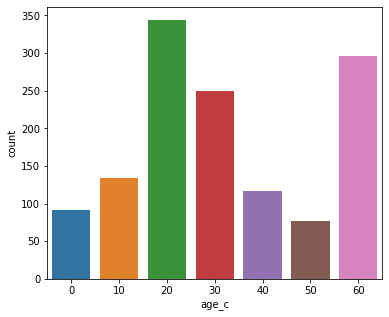

In [18]:
# age 카테고리의 분포그래프 
sns.countplot('age_c',data = df.sort_values('age_c'))

<AxesSubplot:xlabel='age_c', ylabel='survived'>

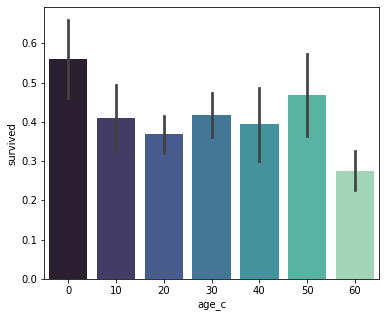

In [19]:
#나이대별 생존률
sns.barplot(x ='age_c', y='survived' , data= df.sort_values('age_c') ,palette='mako')

In [20]:
# 성별 원핫 인코더
age_o = pd.get_dummies(df.sex)
df['female'] = age_o.female
df['male'] = age_o.male
df


,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,age_c,female,male
0,1,1,female,29.00,0,0,211.3375,B5,S,20,1,0
1,1,1,male,0.92,1,2,151.5500,C22 C26,S,0,0,1
2,1,0,female,2.00,1,2,151.5500,C22 C26,S,0,1,0
3,1,0,male,30.00,1,2,151.5500,C22 C26,S,30,0,1
4,1,0,female,25.00,1,2,151.5500,C22 C26,S,20,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,female,14.50,1,0,14.4542,N,C,10,1,0
1305,3,0,female,NaN,1,0,14.4542,N,C,60,1,0
1306,3,0,male,26.50,0,0,7.2250,N,C,20,0,1
1307,3,0,male,27.00,0,0,7.2250,N,C,20,0,1


In [21]:
df.drop('sex',axis=1,inplace =True)

In [22]:
df

,pclass,survived,age,sibsp,parch,fare,cabin,embarked,age_c,female,male
0,1,1,29.00,0,0,211.3375,B5,S,20,1,0
1,1,1,0.92,1,2,151.5500,C22 C26,S,0,0,1
2,1,0,2.00,1,2,151.5500,C22 C26,S,0,1,0
3,1,0,30.00,1,2,151.5500,C22 C26,S,30,0,1
4,1,0,25.00,1,2,151.5500,C22 C26,S,20,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,14.50,1,0,14.4542,N,C,10,1,0
1305,3,0,NaN,1,0,14.4542,N,C,60,1,0
1306,3,0,26.50,0,0,7.2250,N,C,20,0,1
1307,3,0,27.00,0,0,7.2250,N,C,20,0,1


<AxesSubplot:xlabel='age_c', ylabel='survived'>

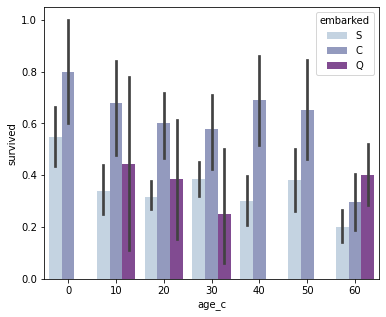

In [23]:
# 성별 및 나이대별 생존률을
sns.barplot(x ='age_c', y='survived' ,hue ='embarked' , data= df.sort_values('age_c'),palette='BuPu')

C:\Users\bs\anaconda3\envs\bs\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pclass', ylabel='count'>

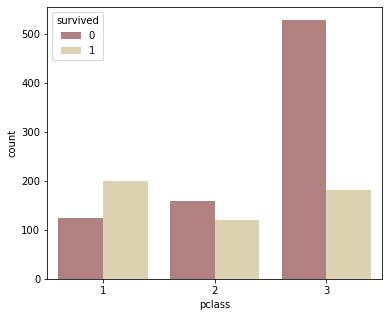

In [24]:
# 클래스별 생존률
sns.countplot('pclass', hue='survived',data =df, palette='pink')

<AxesSubplot:xlabel='pclass', ylabel='survived'>

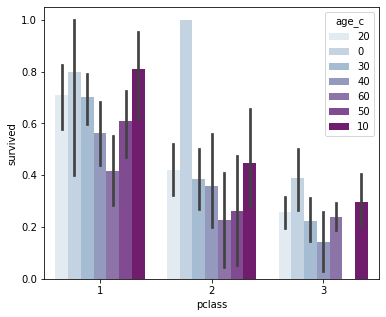

In [25]:
# 성별 및 클래스별 생존률
sns.barplot(x='pclass',y = 'survived',hue='age_c',data = df , palette='BuPu' )

<AxesSubplot:xlabel='pclass', ylabel='survived'>

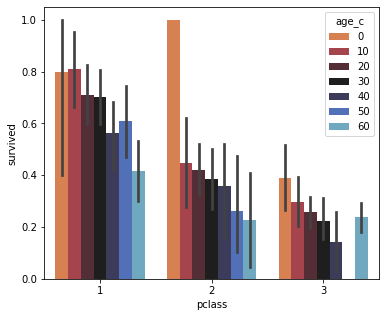

In [26]:
#나이대 및 클래스별 생존률
sns.barplot(x='pclass', y='survived',hue = 'age_c',
            data =df.sort_values('age_c'), palette='icefire_r')

C:\Users\bs\anaconda3\envs\bs\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='family', ylabel='count'>

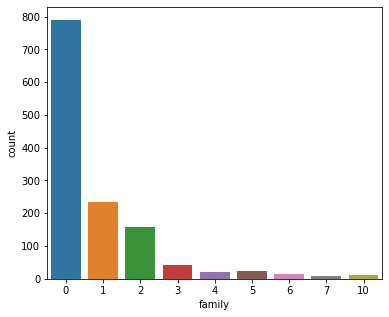

In [27]:
# 배우자,형제,부모 등 같이 탄 인원구분을 가족변수를 만들어 하나로표현 family = sibsp + parch 
df['family'] = df.sibsp + df.parch
sns.countplot('family', data = df)

In [28]:
# 도시 원핫 인코더 
town = pd.get_dummies(df.embarked)
df['town_S'] = town.S
df['town_C'] = town.C
df['town_Q'] = town.Q

df

,pclass,survived,age,sibsp,parch,fare,cabin,embarked,age_c,female,male,family,town_S,town_C,town_Q
0,1,1,29.00,0,0,211.3375,B5,S,20,1,0,0,1,0,0
1,1,1,0.92,1,2,151.5500,C22 C26,S,0,0,1,3,1,0,0
2,1,0,2.00,1,2,151.5500,C22 C26,S,0,1,0,3,1,0,0
3,1,0,30.00,1,2,151.5500,C22 C26,S,30,0,1,3,1,0,0
4,1,0,25.00,1,2,151.5500,C22 C26,S,20,1,0,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,14.50,1,0,14.4542,N,C,10,1,0,1,0,1,0
1305,3,0,NaN,1,0,14.4542,N,C,60,1,0,1,0,1,0
1306,3,0,26.50,0,0,7.2250,N,C,20,0,1,0,0,1,0
1307,3,0,27.00,0,0,7.2250,N,C,20,0,1,0,0,1,0


In [29]:
# 처리된 변수 제거전 카피
df1 = df.copy()

In [30]:
df1.drop(['cabin','age','embarked','sibsp','parch'],axis=1, inplace =True)

In [31]:
# 예측정확도 0.82 이후 

<AxesSubplot:ylabel='Frequency'>

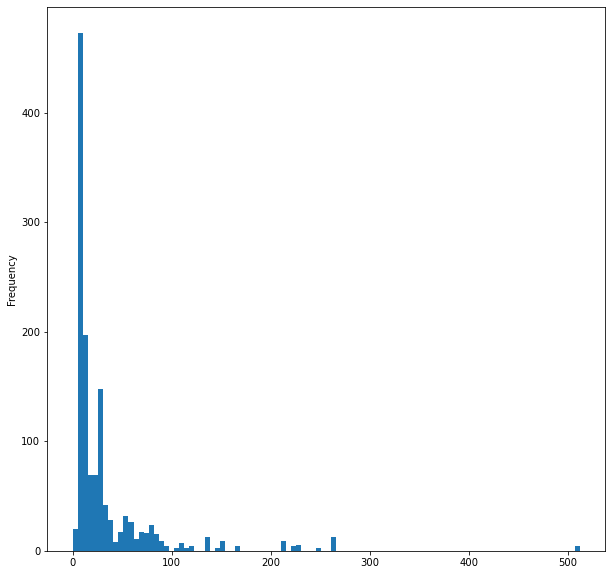

In [32]:
fig = plt.figure(figsize = (10,10)) 
df1.fare.plot(kind = 'hist',bins =100)

In [33]:
df1.fare.value_counts()

8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
31.6792     1
6.2375      1
7.7417      1
28.5375     1
10.7083     1
Name: fare, Length: 282, dtype: int64

In [34]:
df1.fare.max()

512.3292

In [35]:
def fare (x):
    if x == 0 : return '0'
    elif  0 < x <=1 : return '1'
    elif  1 < x <=2 : return '2'
    elif  2 < x <=3 : return '3'
    elif  3 < x <=4 : return '4'
    elif  4 < x <=5 : return '5'
    elif  5 < x <=6 : return '6'
    elif  6 < x <=7 : return '7'
    elif  7 < x <=8 : return '8'
    elif  8 < x <=9 : return '9'
    elif  9 < x <=10 : return '10'
    elif 10 < x <= 20: return '20'
    elif 20 < x <= 30: return '30'
    elif 30 < x <= 40: return '40'
    elif 40 < x <= 50: return '50'
    elif 50 < x <= 60: return '60'
    elif 60 < x <= 70: return '70'
    elif 70 < x <= 80: return '80'
    elif 80 < x <= 100: return '100'
    elif 200 < x <= 300: return '300'
    else : return '500'
df1['fare_c'] = df1.fare.apply(fare)

In [36]:
df1.fare_c = df1.fare_c.astype('float')

<AxesSubplot:ylabel='Frequency'>

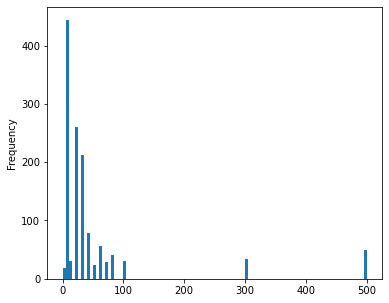

In [37]:
df1.fare_c.plot(kind = 'hist',bins =100)

In [38]:
f_cat = pd.get_dummies(df.family)
f_cat

,0,1,2,3,4,5,6,7,10
0,1,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1304,0,1,0,0,0,0,0,0,0
1305,0,1,0,0,0,0,0,0,0
1306,1,0,0,0,0,0,0,0,0
1307,1,0,0,0,0,0,0,0,0


In [39]:
df1.drop('fare_c',axis =1 ,inplace =True)

In [40]:
df1

,pclass,survived,fare,age_c,female,male,family,town_S,town_C,town_Q
0,1,1,211.3375,20,1,0,0,1,0,0
1,1,1,151.5500,0,0,1,3,1,0,0
2,1,0,151.5500,0,1,0,3,1,0,0
3,1,0,151.5500,30,0,1,3,1,0,0
4,1,0,151.5500,20,1,0,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,14.4542,10,1,0,1,0,1,0
1305,3,0,14.4542,60,1,0,1,0,1,0
1306,3,0,7.2250,20,0,1,0,0,1,0
1307,3,0,7.2250,20,0,1,0,0,1,0


데이터셋 개선을 위한 시사점

- 변수 = 'age_cat','male','female','fare_cat','family',{town_C','town_Q','town_S'}
- age의 Null 값을 평균값으로 대체하면 전체적인 데이터의 왜곡이 심함을 확인
- pclass는 fare_cat이랑 같이 모델에 넣을 경우 정확도가 떨어지고(0.82) 각각 넣었을 때는 fare_cat을 넣었을 때의 정확도가 더 높음(0.82, 3% 차이). 이상치에 가까울 정도로 요금이 높은 사람의 경우 사망률이 3클래스 승객과 비슷한 수치를 보이는 점이 pclass 변수에서는 반영이 되지 않았던 것이 원인으로 추측
- sex, embarked 변수로 집어넣은 것보다 원핫 인코더(dummies)로 처리해서 넣는 것이 정확도를 대략 5% 정도 높여주며 디시전 트리의 분기를 더 쉽게하는 효과 확인
- parch와 sibsp를 각각 변수에 적용하면 의미 있는 양상이 보이지 않고 정확도를 떨어뜨리지만 두 변수를 합쳐서 family라는 파생변수를 생성하면 생존율이 높은 여성 승객일지라도 가족 구성원 수가 많으면 생존율이 낮아지는 것을 확인

전처리 내역
- age null 처리방법 변경 : 평균값 대체 > 삭제
- pclass와 fare_cat중 분석변수 선택
- embarked 원핫인코딩

In [41]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 독립변수, 종속변수 분리
y_t_df = df1['survived'] # 종속변수
X_t_df = df1.drop('survived', axis = 1) # 독립변수

# 독립변수 정규화
# X_t_df = preprocessing.StandardScaler().fit(X_t_df).transform(X_t_df)

# 학습용 데이터와 평가용 데이터를 8:2로 분리
X_train, X_test, y_train, y_test = train_test_split(X_t_df, y_t_df, test_size = 0.2,
                                                   random_state = 11)

print(X_train.shape)
print(X_test.shape)

(1047, 9)
(262, 9)


In [45]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, lr_pred)
print('Logistic Regression 예측 정확도 :% 1.2f ' % accuracy_lr)

Logistic Regression 예측 정확도 : 0.82 


C:\Users\bs\anaconda3\envs\bs\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
